In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,recall_score,confusion_matrix
import random
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
from sklearn.svm import SVC
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Group_15_Resampled_Data.csv")

In [3]:
df.head()

,Unnamed: 0,n_address,gaussian_income,gaussian_neighbors,gaussian_weight,gaussian_length,log_count,sigmoid_looped,interaction_count_income,day_of_week,quarter_number,interaction_length_weight,Label-0/1
0,0,0.0,4.139383,5.841922e-01,-2.176504,-0.005319,9.999995e-07,0.5,2.0,4.0,1.0,1.0,0.0
1,1,0.0,4.128887,9.999992e-07,-1.459234,-0.175784,6.931477e-01,0.5,0.0,3.0,4.0,1.0,0.0
2,2,0.0,4.117056,5.841922e-01,0.000000,-0.895270,9.999995e-07,0.5,2.0,2.0,2.0,2.0,0.0
3,3,0.0,4.149871,5.841922e-01,0.000000,-0.175784,9.999995e-07,0.5,2.0,6.0,2.0,0.0,0.0
4,4,0.0,4.137021,5.841922e-01,-4.982589,-0.835088,7.823646e+00,1.0,0.0,1.0,4.0,1.0,0.0


In [4]:
df = df.iloc[:,1:]

In [5]:
df['Label-0/1'].value_counts()

0.0    414130
1.0    414130
Name: Label-0/1, dtype: int64

In [6]:
X = df.drop(['Label-0/1'], axis = 1)
y = df['Label-0/1']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42,test_size = 0.2)

### Support Vector Machines

In [ ]:
#Hyper-paramter tuning
svc_hyperparams = RandomizedSearchCV(
    estimator = SVC(),
    param_distributions = {
        'C' : [1, 10,100,1000]
    },
    n_jobs = -1,
    verbose = 5,
    random_state = 42,
    return_train_score = True,
    n_iter = 10
)
svc_hyperparams.fit(X_train,y_train)

In [ ]:
#best hyper-parameter
svc_hyperparams.best_params_

In [8]:
#fitting the model with best params
from sklearn.linear_model import SGDClassifier
svc_model = SGDClassifier(
    loss = 'hinge',
    n_jobs = -1,
    alpha = 1e-6, # alpha = 1/C and our best C = 100
    penalty = 'elasticnet',
    random_state = 42,
    class_weight = 'balanced'
).fit(X_train, y_train)

In [9]:
svc_preds = svc_model.predict(X_train)

In [10]:
print("Accuracy for our training dataset",accuracy_score(y_true = y_train, y_pred = svc_preds))
recall_score = recall_score(y_true = y_train, y_pred = svc_preds)
print("Recall for our testing dataset",recall_score)

Accuracy for our training dataset 0.708790114215343
Recall for our testing dataset 0.5611850268542083


In [11]:
cm = confusion_matrix(y_train,svc_preds)

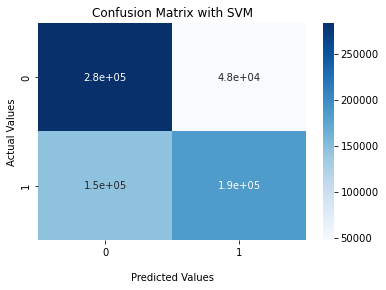

In [12]:
ax = sns.heatmap(cm, annot = True, cmap = 'Blues')
ax.set_title("Confusion Matrix with SVM")
ax.set_xlabel("\nPredicted Values")
ax.set_ylabel("Actual Values")
plt.show()

In [13]:
import pickle

In [14]:
filename = 'svc_model.sav'
pickle.dump(svc_model, open(filename, 'wb'))